We discussed the basics of Artificial Neural Network (or Multi-Layer Perceptron) in the last few weeks. Now you can implement a simple version of ANN by yourself, but there are already many packages online that you can use it with more flexible settings. This week, we will give an exmaple of using MLP from the awesome [scikit-learn](http://scikit-learn.org/stable/).  

We will work on the famous [Handwritten Digits Data Sets](http://scikit-learn.org/stable/datasets/#optical-recognition-of-handwritten-digits-data-set), and classify the digits using MLP. This is vastly used everywhere these days, for example, when you deposit a check at ATM, an algorithm similar to what we will cover here to recognize the number you wrote. You can also check their website about the introduction of the [ANN](http://scikit-learn.org/stable/modules/neural_networks_supervised.html). Let's start now!

In [19]:
# import all the needed module
import itertools
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
plt.style.use('seaborn-poster')
%matplotlib inline

## Load and visualize data 

Let's load the [Handwritten Digits Data Set](http://scikit-learn.org/stable/datasets/#optical-recognition-of-handwritten-digits-data-set) from sklearn. The data set contains images of hand-written digits: 10 classes where each class refers to a digit. The data that we are interested in is made of 8x8 images of digits, and we will plot the first 64 samples below. 

In [20]:
# load data
digits = load_digits()
print('We have %d samples'%len(digits.target))

We have 1797 samples


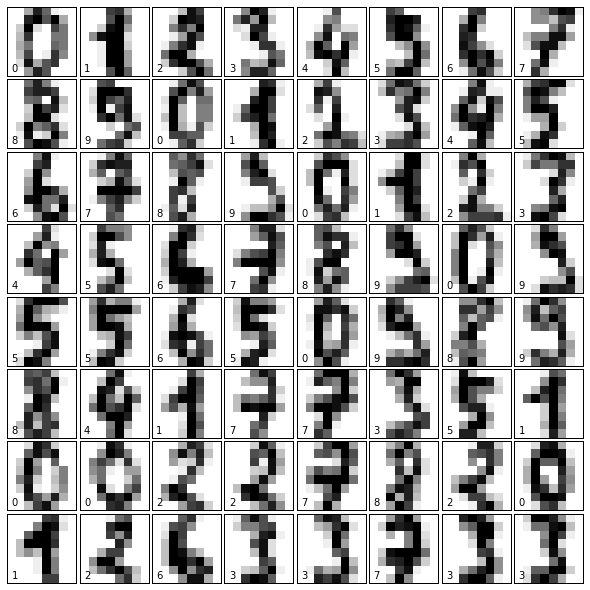

In [21]:
## plot the first 64 samples, and get a sense of the data
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

## Train an ANN classifier  

We will split the whole data into 80% training data and 20% test data. We then will build an ANN model using the default parameter setting, and train it using the training data. 

In [33]:
# split data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=16)
print('Number of samples in training set: %d, number of samples in test set: %d'%(len(y_train), len(y_test)))

Number of samples in training set: 1437, number of samples in test set: 360


In [34]:
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Initialize ANN classifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

# Train the classifier with the traning data
mlp.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

## Test ANN classifier and evaluate  

After we trained the ANN classifier, we will test the performance of the classifier using the test data. To evaluate the results, we will plot the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). 

In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig = plt.figure(figsize=(8, 8)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [37]:
predicted = mlp.predict(X_test_scaled)

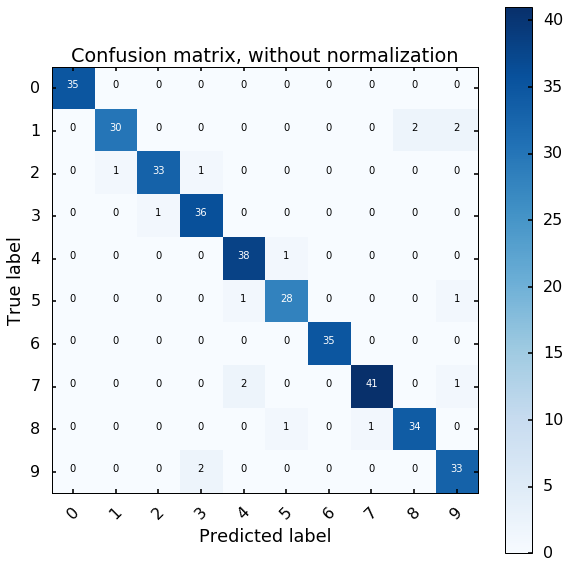

In [38]:
cm = confusion_matrix(y_test,predicted)
plot_confusion_matrix(cm, classes=digits.target_names,
                      title='Confusion matrix, without normalization')

## Visualize the test results

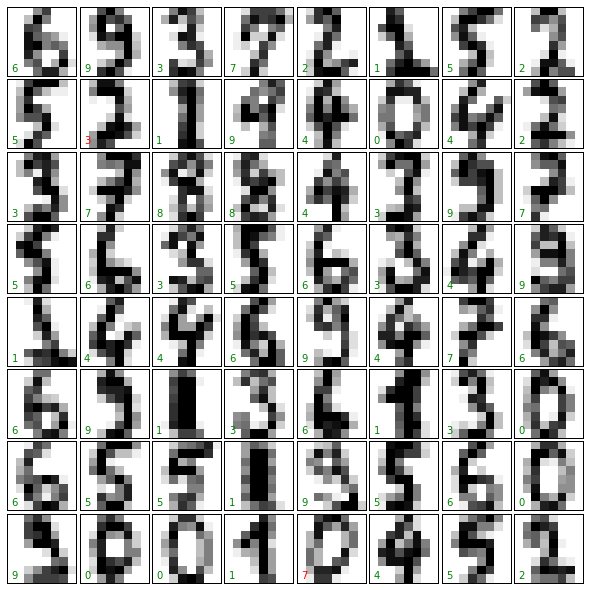

In [32]:
expected = y_test 
fig = plt.figure(figsize=(8, 8))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')